In [28]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from prova import best_fit, gaus, clean_data, apri, conversione_lin_plot

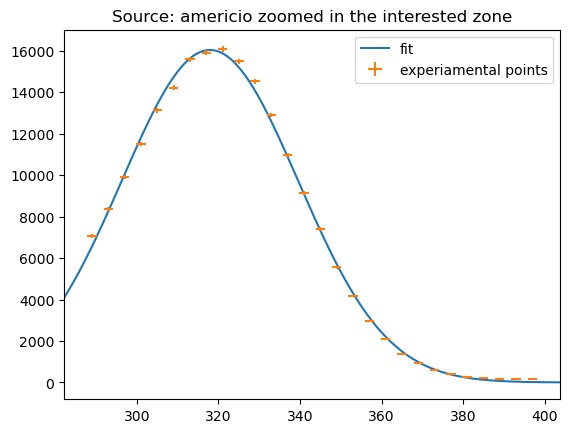

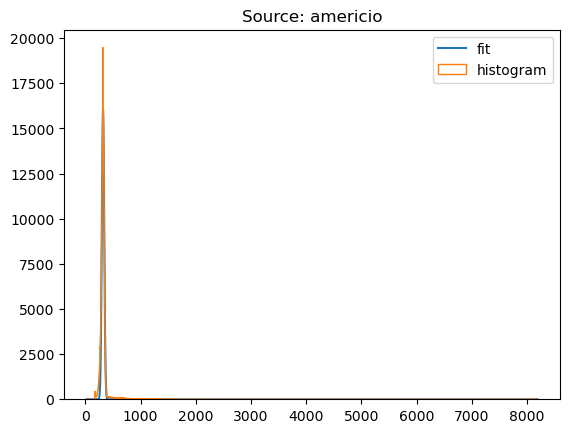

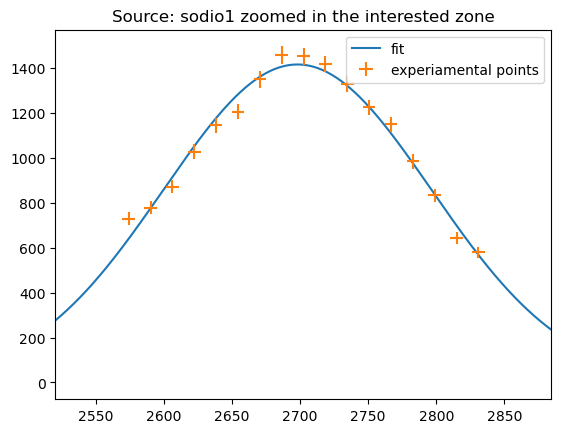

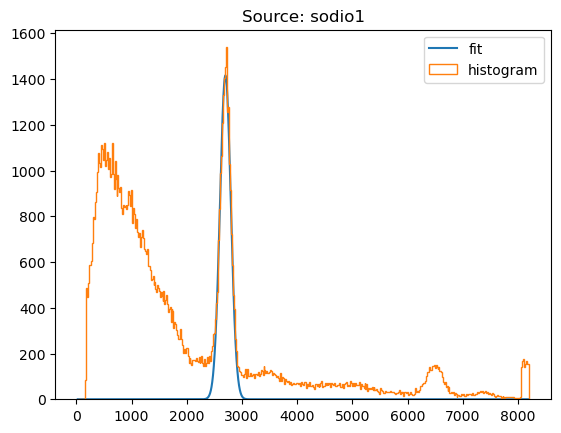

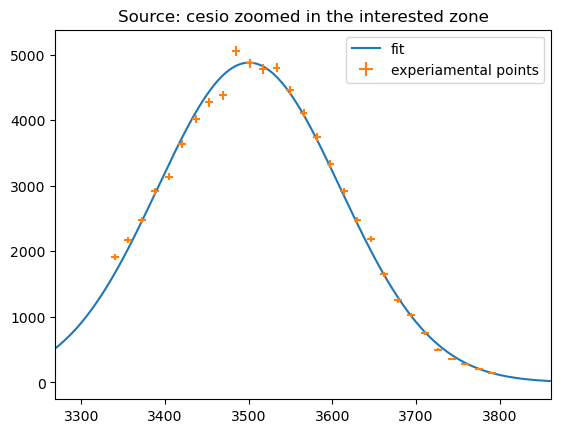

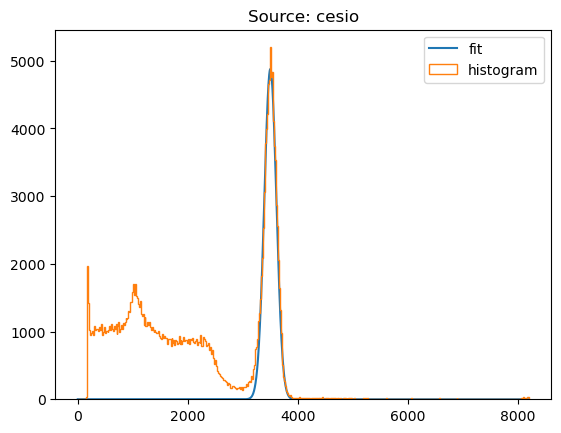

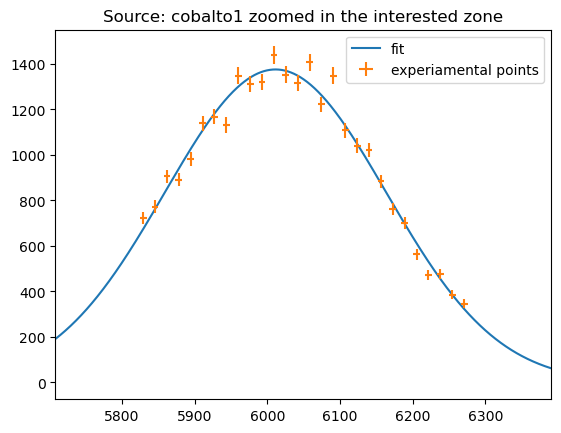

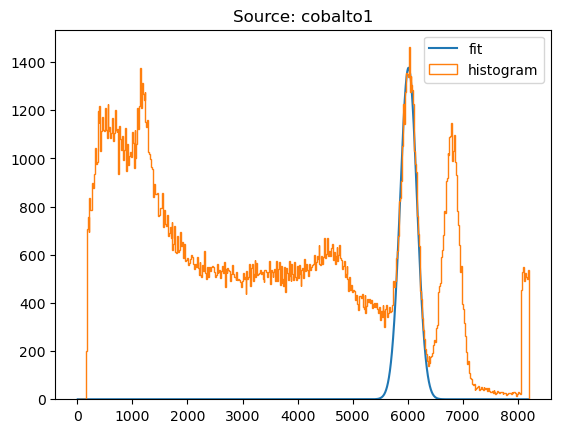

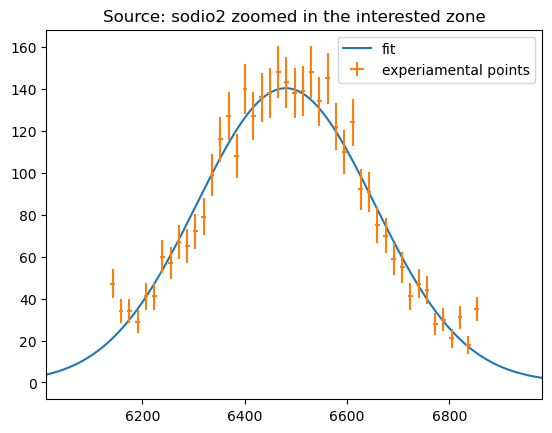

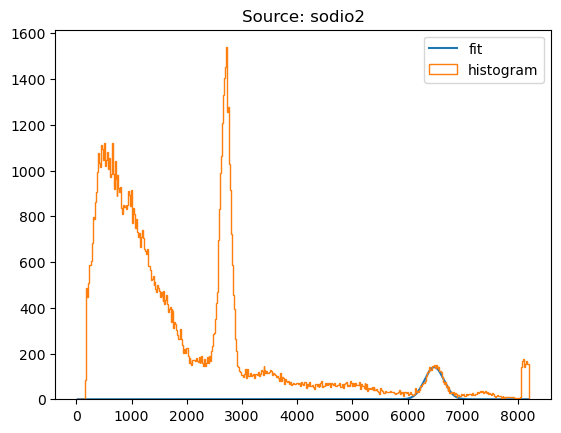

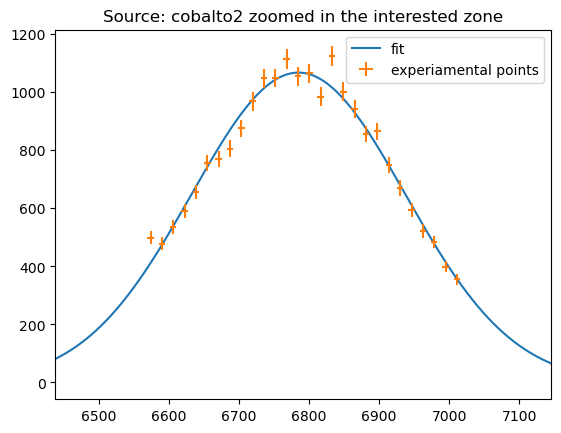

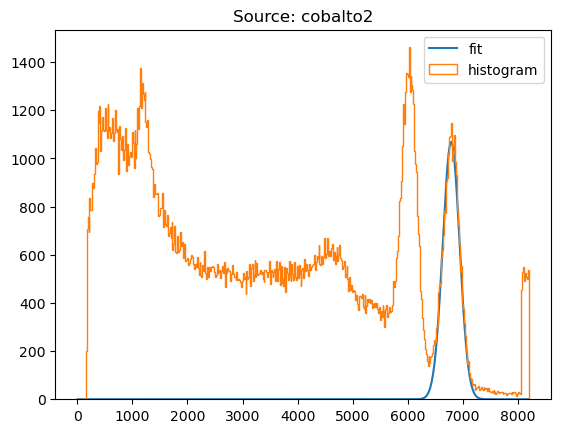

In [29]:
sorgenti = ["americio", "sodio1", "cesio", "cobalto1", "sodio2", "cobalto2"]
file = [r"Data\290323\290323_americio2.dat",
        r"Data\290323\290323_sodio2.dat",
        r"Data\290323\290323_cesio2.dat",
        r"Data\290323\290323_cobalto2.dat",
        r"Data\290323\290323_sodio2.dat",
        r"Data\290323\290323_cobalto2.dat"]
inf = np.array([286, 2565, 3331, 5820, 6133, 6565])
sup = np.array([400, 2840, 3800, 6280, 6862, 7020])
theta = np.radians(22)

media = []
err_media = []

larghezza = []
err_larghezza = []

for i in range(len(inf)):
     popt, pcov, minimo, massimo =best_fit(file[i], inf[i], sup[i], sorgenti[i])

     z=np.linspace(minimo, massimo, 100000)
     y_output = gaus(z, C=popt[0],mean=popt[1],sigma=popt[2])
    
     plt.plot(z,y_output, label='fit')

     y,E,dy,dE,_=clean_data(file[i], inf[i], sup[i], sorgenti[i])
     plt.errorbar(E,y,dy,dE,' ', label='experiamental points')

     left=min(E)
     right=max(E)

     left=left-(right+left)/100
     right=right+(right+left)/100
     plt.xlim(left=left,right=right)


     plt.title(f"Source: {sorgenti[i]} zoomed in the interested zone")
     plt.legend()
     plt.show()

     plt.plot(z,y_output, label='fit')


     plt.hist(apri(file[i]),bins= 2000 if sorgenti[i]== "americio" else 500, histtype='step',label='histogram')

     plt.title(f"Source: {sorgenti[i]}")
     plt.legend()
     plt.show()

     media.append([popt[1]])
     err_media.append(np.sqrt(pcov[1][1]))

     larghezza.append([popt[2]])
     err_larghezza.append(np.sqrt(pcov[2][2]))
  

media=np.array(media)
err_media=np.array(err_media)

larghezza=np.array(larghezza)
err_larghezza=np.array(err_larghezza)



In [30]:
for i in range(len(media)):
    print(f'Media {sorgenti[i]}:', media[i],'+-', err_media[i])

for i in range(len(larghezza)):
    print(f'Larghezza {sorgenti[i]}:', larghezza[i],'+-', err_larghezza[i])





Media americio: [317.91093281] +- 0.27465121258571856
Media sodio1: [2697.9768894] +- 1.5357832056037133
Media cesio: [3500.3038535] +- 1.1889707286029856
Media cobalto1: [6011.28045745] +- 2.3745247791768938
Media sodio2: [6480.0051168] +- 3.9456908557340262
Media cobalto2: [6784.96483832] +- 2.0179837242835323
Larghezza americio: [21.63698931] +- 0.21735010518064182
Larghezza sodio1: [98.4014146] +- 2.125028060051069
Larghezza cesio: [109.38742413] +- 1.0025229514812815
Larghezza cobalto1: [152.46553515] +- 2.765600705948039
Larghezza sodio2: [173.84258215] +- 3.8482840670131133
Larghezza cobalto2: [152.66157825] +- 2.6047077112018786


Parametridi best fit
 a = 5047.838796562043 +- 51.78429195153297
 b = 80.42972975498232 +- 49.495825998770535


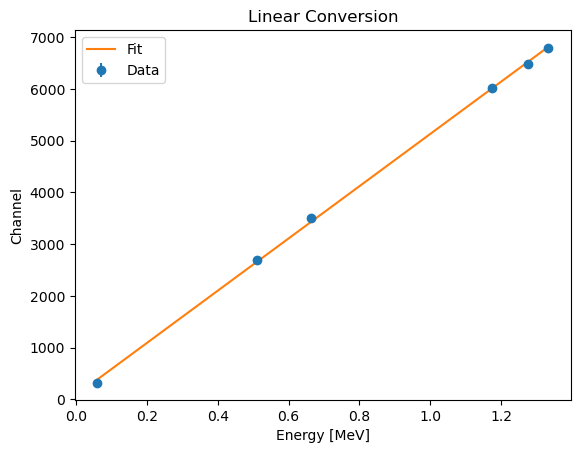

In [62]:
#FIT IMPLEMENTATO TRAMITE curve_fit
def linear_func(x, m, b):
    return m * x + b
    
energy = np.array([0.060, 0.511, 0.662, 1.173, 1.275, 1.333])
channel=np.array(media)


popt,pcov= curve_fit(linear_func,energy,channel.ravel(), absolute_sigma=False)
# Print the best fitting parameters
print('Parametridi best fit')
print(f" a = {popt[0]} +- {np.sqrt(pcov[0][0])}")
print(f" b = {popt[1]} +- {np.sqrt(pcov[1][1])}")


plt.errorbar(energy, channel.ravel(), yerr=err_media, fmt='o', label='Data')
plt.plot(energy, linear_func(energy, *popt), label='Fit')
plt.xlabel('Energy [MeV]')
plt.ylabel('Channel')
plt.title('Linear Conversion')
plt.legend()
plt.show()

Il parametro a vale:  [5149.21453271]  +-  [1.02198668]
Il parametro b vale:  [12.22366967]  +-  [0.29663892]
Chisquare = 5.9
Chisquare norm = 2.0


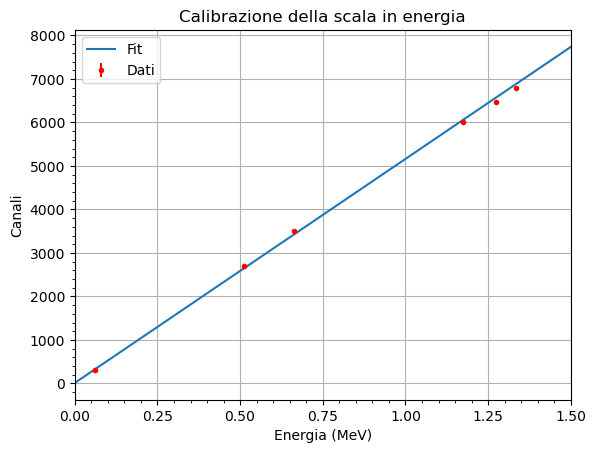

In [79]:
energie = np.array([0.060, 0.511, 0.662, 1.173, 1.275, 1.333])
channel=np.array(media)


weights=1/err_media


z, cov = np.polyfit(energie, channel, deg = 1, w = weights, full = False, cov = 'unscaled')


conversione = z[0]
offset = z[1]
err_conversione = np.sqrt(cov[0][0])
err_offset = np.sqrt(cov[1][1])

correlazione_conv_off = cov[0][1]

print("Il parametro a vale: ", conversione, " +- ", err_conversione)
print("Il parametro b vale: ", offset, " +- ", err_offset)



xp = np.linspace(0, 1.5, 1000)
yp = xp*conversione + offset
    

chisq = ((((channel.ravel() - (conversione*energie + offset))**2 / (conversione*energie + offset)))).sum()
print(f'Chisquare = {chisq:.1f}')
chisq_norm=chisq/(len(channel.ravel())-3)
print(f'Chisquare norm = {chisq_norm:.1f}')
        
plt.title('Calibrazione della scala in energia')
plt.xlabel('Energia (MeV)')
plt.ylabel('Canali')
plt.minorticks_on()
plt.xticks(ticks=np.arange(0, 1.5001, step = 0.25))
plt.xlim(left=0)
plt.xlim(right=1.5)
plt.tick_params(axis='both', which='minor')
plt.grid(visible=True, which='major')
plt.rc('axes', labelsize=10)



plt.errorbar(energie, channel.ravel(), yerr=err_media, marker = '.', linestyle = '', c='r')

plt.plot(xp, yp)

plt.gca().legend(['Fit', 'Dati'])

plt.show()
    



In [ ]:
energie = np.array([0.060, 0.511, 0.662, 1.173, 1.275, 1.333])
channel=np.array(media)


weights=1/err_media


z, cov = np.polyfit(energie, channel, deg = 2, w = weights, full = False, cov = 'unscaled')


A = z[0]
B = z[1]
C = z[2]
err_A = np.sqrt(cov[0][0])
err_B = np.sqrt(cov[1][1])
err_C = np.sqrt(cov[2][2])


correlazione_A_B = cov[0][1]
correlazione_A_C = cov[0][2]
correlazione_B_C = cov[1][2]



print("Il parametro a vale: ", conversione, " +- ", err_conversione)
print("Il parametro b vale: ", offset, " +- ", err_offset)



xp = np.linspace(0, 1.5, 1000)
yp = xp*conversione + offset
    

chisq = ((((channel.ravel() - (conversione*energie + offset))**2 / (conversione*energie + offset)))).sum()
print(f'Chisquare = {chisq:.1f}')
chisq_norm=chisq/(len(channel.ravel())-3)
print(f'Chisquare norm = {chisq_norm:.1f}')
        
plt.title('Calibrazione della scala in energia')
plt.xlabel('Energia (MeV)')
plt.ylabel('Canali')
plt.minorticks_on()
plt.xticks(ticks=np.arange(0, 1.5001, step = 0.25))
plt.xlim(left=0)
plt.xlim(right=1.5)
plt.tick_params(axis='both', which='minor')
plt.grid(visible=True, which='major')
plt.rc('axes', labelsize=10)



plt.errorbar(energie, channel.ravel(), yerr=err_media, marker = '.', linestyle = '', c='r')

plt.plot(xp, yp)

plt.gca().legend(['Fit', 'Dati'])

plt.show()
    

